In [20]:
!pip install yfinance

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [22]:
# Definimos el rango de los datos
start = '2018-10-10'
end = '2023-10-10'

In [23]:
# Definimos los tickers de los assets
assets = ['TTWO', 'BABA', 'PYPL', 'INTC', 'META', 'MSFT', 'BRK-B', 'AMZN', 'NVDA', 'AMD', 'VOO', 'NU']
assets.sort()

In [24]:
print(assets)

['AMD', 'AMZN', 'BABA', 'BRK-B', 'INTC', 'META', 'MSFT', 'NU', 'NVDA', 'PYPL', 'TTWO', 'VOO']


In [25]:
# Descargamos los datos
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  12 of 12 completed


In [26]:
print(data)

                   AMD        AMZN        BABA       BRK-B       INTC  \
Date                                                                    
2018-10-10   25.000000   87.762497  136.455658  213.100006  38.714367   
2018-10-11   25.299999   85.968002  140.017776  205.190002  38.221802   
2018-10-12   26.340000   89.430496  145.336288  206.800003  38.783504   
2018-10-15   26.260000   88.047501  142.247818  205.029999  38.481037   
2018-10-16   28.180000   90.998001  147.615662  209.830002  39.699512   
...                ...         ...         ...         ...        ...   
2023-10-03  100.080002  124.720001   83.418633  343.040009  35.469059   
2023-10-04  104.070000  127.000000   82.964737  343.690002  35.707581   
2023-10-05  102.910004  125.959999   82.560173  345.059998  35.667824   
2023-10-06  107.239998  127.959999   84.918465  346.339996  35.965965   
2023-10-09  106.970001  128.259995   83.724518  345.450012  35.836773   

                  META        MSFT    NU        NV

In [27]:
# Calculando los retornos

Y = data.resample('M').last().pct_change().dropna()

display(Y.head())

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
Date,,,,,,,,,,,,
2022-01-31,-0.206046,-0.102830,0.058928,0.046890,-0.052039,-0.068649,-0.075345,-0.208955,-0.167454,-0.088238,-0.080914,-0.052409
2022-02-28,0.079562,0.026673,-0.163765,0.026931,-0.015499,-0.326342,-0.037212,0.030997,-0.004125,-0.349017,-0.008204,-0.029805
2022-03-31,-0.113507,0.061437,0.034319,0.097869,0.038994,0.053689,0.031862,0.009150,0.119157,0.033235,-0.050988,0.037892
2022-04-30,-0.217853,-0.237525,-0.107629,-0.085234,-0.120460,-0.098444,-0.099867,-0.221503,-0.320274,-0.239689,-0.222649,-0.087844
2022-05-31,0.191066,-0.032764,-0.010712,-0.021219,0.027096,-0.034070,-0.018077,-0.366057,0.006740,-0.030934,0.042005,0.002588


In [28]:
!pip install riskfolio-lib

In [29]:
import riskfolio as rp

In [30]:
# Construyendo el objeto portafolio
port = rp.Portfolio(returns=Y)

In [31]:
# Calculando el portafolio optimo

# Definiendo los parametros de seleccion del metodo de optimizacion:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

In [32]:
# Estimando el portafolio optimo:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MaxRet' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
weights,2.958989e-11,1.755852e-11,1.809665e-11,4.360010e-11,1.262288e-11,5.291076e-11,2.587533e-11,2.604738e-11,1.0,1.086664e-11,1.445500e-11,2.010907e-11


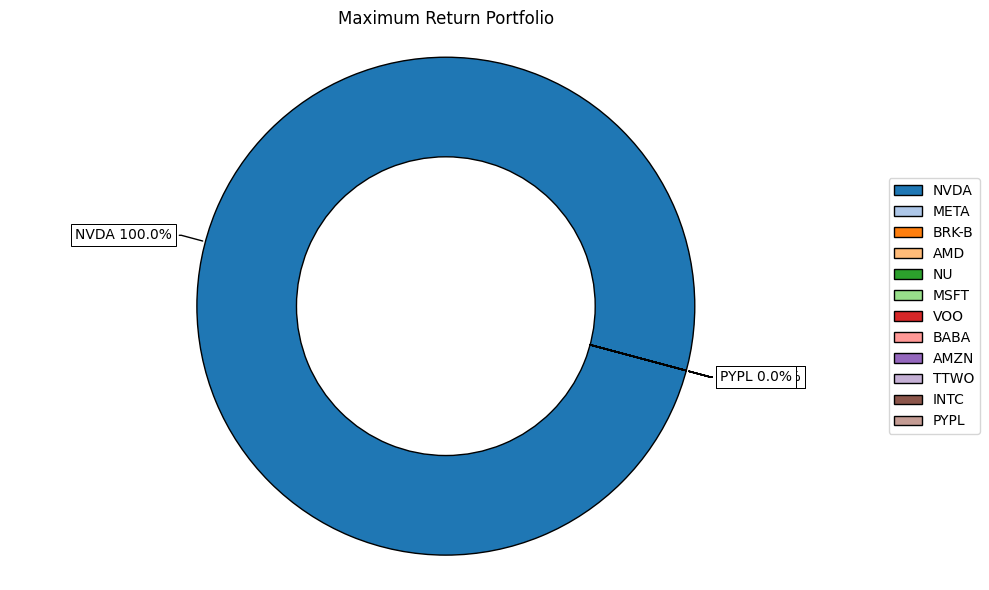

In [33]:
# Graficando la composicion del portafolio

ax = rp.plot_pie(w=w, title='Maximum Return Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


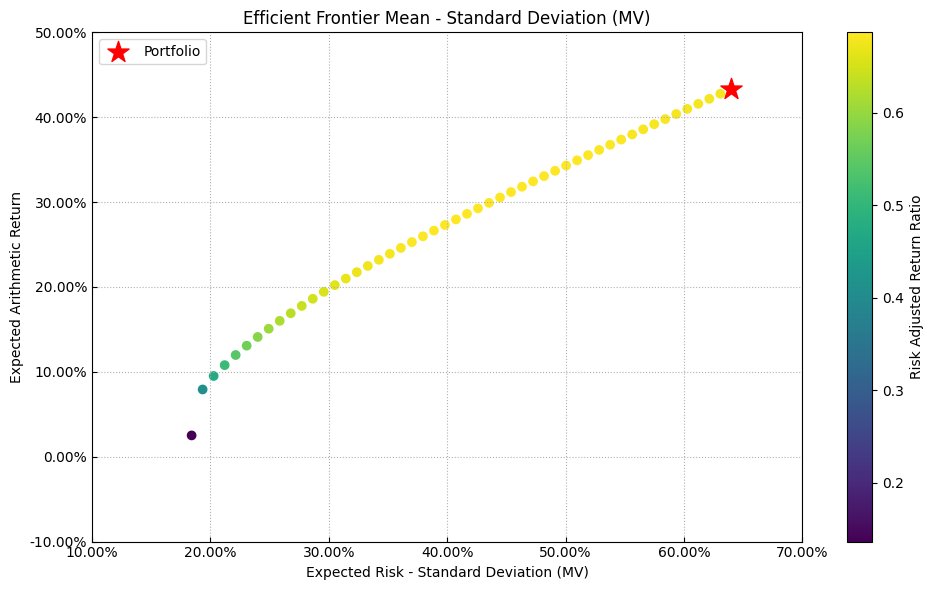

In [34]:
# Graficando la frontera eficiente
frontier=port.efficient_frontier(model=model,rm=rm,points=50,rf=rf,hist=hist)
ax=rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=Y,rm=rm,rf=rf,cmap='viridis',w=w,t_factor=12)
plt.show()

In [35]:
display(frontier.T.head())

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
0,2.440865e-11,4.297138e-11,0.095705,0.421085,4.819957e-11,8.370760e-11,2.915659e-02,9.152315e-03,1.468029e-11,4.318869e-11,1.312781e-01,3.136229e-01
1,4.892503e-09,5.303071e-09,0.094281,0.764779,4.627829e-09,1.307932e-02,8.142280e-02,4.643727e-02,1.776712e-08,1.689078e-09,4.689845e-08,2.451767e-08
2,1.349713e-10,1.186581e-10,0.063699,0.840630,1.053418e-10,5.770310e-02,3.254477e-09,2.936091e-02,8.606874e-03,3.258195e-11,5.459049e-10,3.918436e-10
3,2.476497e-10,2.211864e-10,0.054325,0.840335,1.966044e-10,5.455477e-02,3.984240e-09,1.193516e-02,3.884945e-02,6.358381e-11,8.601566e-10,6.795574e-10
4,3.651414e-10,3.859838e-10,0.045294,0.835917,3.481467e-10,5.061887e-02,2.772524e-09,1.200554e-08,6.817014e-02,1.193941e-10,1.069598e-09,1.157155e-09


In [36]:
frontier*100

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AMD,2.440865e-09,4.892503e-07,1.349713e-08,2.476497e-08,3.651414e-08,1.531160e-08,1.637163e-08,1.922524e-08,2.007273e-08,1.490820e-07,...,2.075073e-08,1.989852e-08,1.947881e-08,1.927141e-08,1.899851e-08,1.845771e-08,1.767474e-08,1.708387e-08,2.024051e-08,2.352340e-09
AMZN,4.297138e-09,5.303071e-07,1.186581e-08,2.211864e-08,3.859838e-08,1.412646e-08,1.630979e-08,2.070955e-08,2.174597e-08,1.621713e-07,...,1.771263e-08,1.735494e-08,1.736534e-08,1.758047e-08,1.776415e-08,1.773754e-08,1.754430e-08,1.768052e-08,2.243901e-08,7.427614e-10
BABA,9.570513e+00,9.428108e+00,6.369904e+00,5.432548e+00,4.529432e+00,3.618840e+00,2.769791e+00,1.965779e+00,1.197637e+00,4.566176e-01,...,1.082542e-08,1.242186e-08,1.451557e-08,1.717252e-08,2.022864e-08,2.352828e-08,2.721264e-08,3.224000e-08,4.820545e-08,7.953153e-11
BRK-B,4.210850e+01,7.647794e+01,8.406301e+01,8.403351e+01,8.359167e+01,8.212817e+01,8.076271e+01,7.947157e+01,7.823594e+01,7.704531e+01,...,1.624988e+01,1.442687e+01,1.260879e+01,1.079538e+01,8.986390e+00,7.181577e+00,5.380726e+00,3.583637e+00,1.790120e+00,2.021121e-09
INTC,4.819957e-09,4.627829e-07,1.053418e-08,1.966044e-08,3.481467e-08,1.439001e-08,1.684114e-08,2.049175e-08,2.185400e-08,1.652647e-07,...,1.567097e-08,1.563867e-08,1.592636e-08,1.641342e-08,1.689126e-08,1.719501e-08,1.737332e-08,1.793888e-08,2.350981e-08,1.778469e-10
META,8.370760e-09,1.307932e+00,5.770310e+00,5.455477e+00,5.061887e+00,4.442321e+00,3.866633e+00,3.321126e+00,2.798553e+00,2.295104e+00,...,1.762567e-08,1.820784e-08,1.954837e-08,2.179270e-08,2.489375e-08,2.894448e-08,3.458298e-08,4.387345e-08,7.138336e-08,2.374775e-09
MSFT,2.915659e+00,8.142280e+00,3.254477e-07,3.984240e-07,2.772524e-07,6.683132e-08,6.627137e-08,9.332944e-08,9.220312e-08,6.520611e-07,...,1.530597e-08,1.674918e-08,1.858486e-08,2.093036e-08,2.363358e-08,2.657728e-08,3.000757e-08,3.512792e-08,5.235648e-08,1.789196e-11
NU,9.152315e-01,4.643727e+00,2.936091e+00,1.193516e+00,1.200554e-06,6.769245e-08,4.546086e-08,7.594084e-08,6.938674e-08,4.633864e-07,...,1.995469e-08,2.011443e-08,2.070635e-08,2.161679e-08,2.260683e-08,2.350560e-08,2.446446e-08,2.635631e-08,3.633478e-08,9.493337e-10
NVDA,1.468029e-09,1.776712e-06,8.606874e-01,3.884945e+00,6.817014e+00,9.810666e+00,1.260086e+01,1.524152e+01,1.776787e+01,2.020297e+01,...,8.375012e+01,8.557313e+01,8.739121e+01,8.920462e+01,9.101361e+01,9.281842e+01,9.461927e+01,9.641636e+01,9.820988e+01,1.000000e+02
PYPL,4.318869e-09,1.689078e-07,3.258195e-09,6.358381e-09,1.193941e-08,5.012162e-09,5.875507e-09,7.107362e-09,7.600500e-09,5.768689e-08,...,7.841352e-09,7.730848e-09,7.761371e-09,7.854851e-09,7.896569e-09,7.789597e-09,7.521144e-09,7.248782e-09,8.706348e-09,1.241871e-09


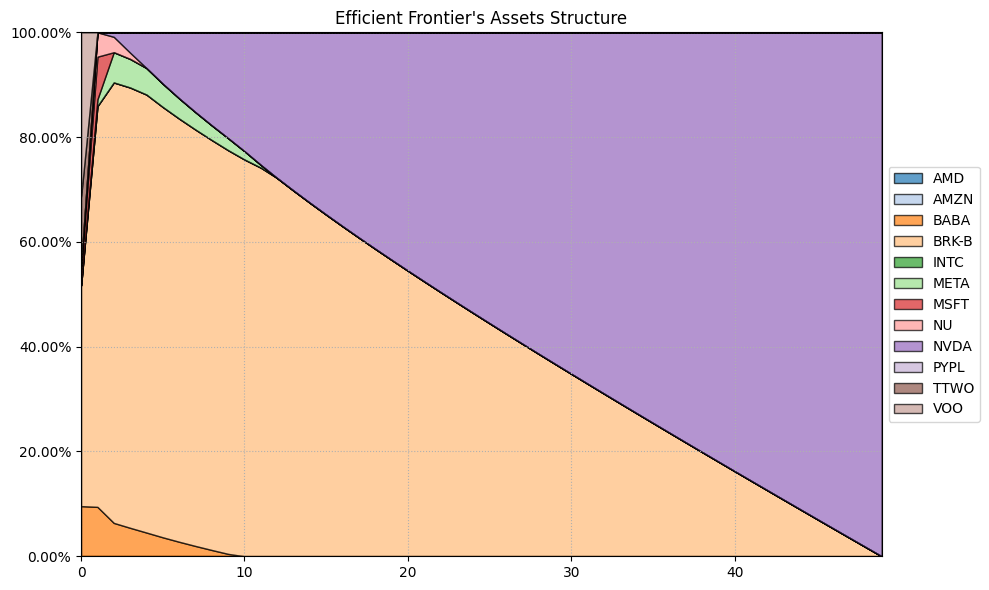

In [37]:
ax=rp.plot_frontier_area(w_frontier=frontier,cmap='tab20')
plt.show()

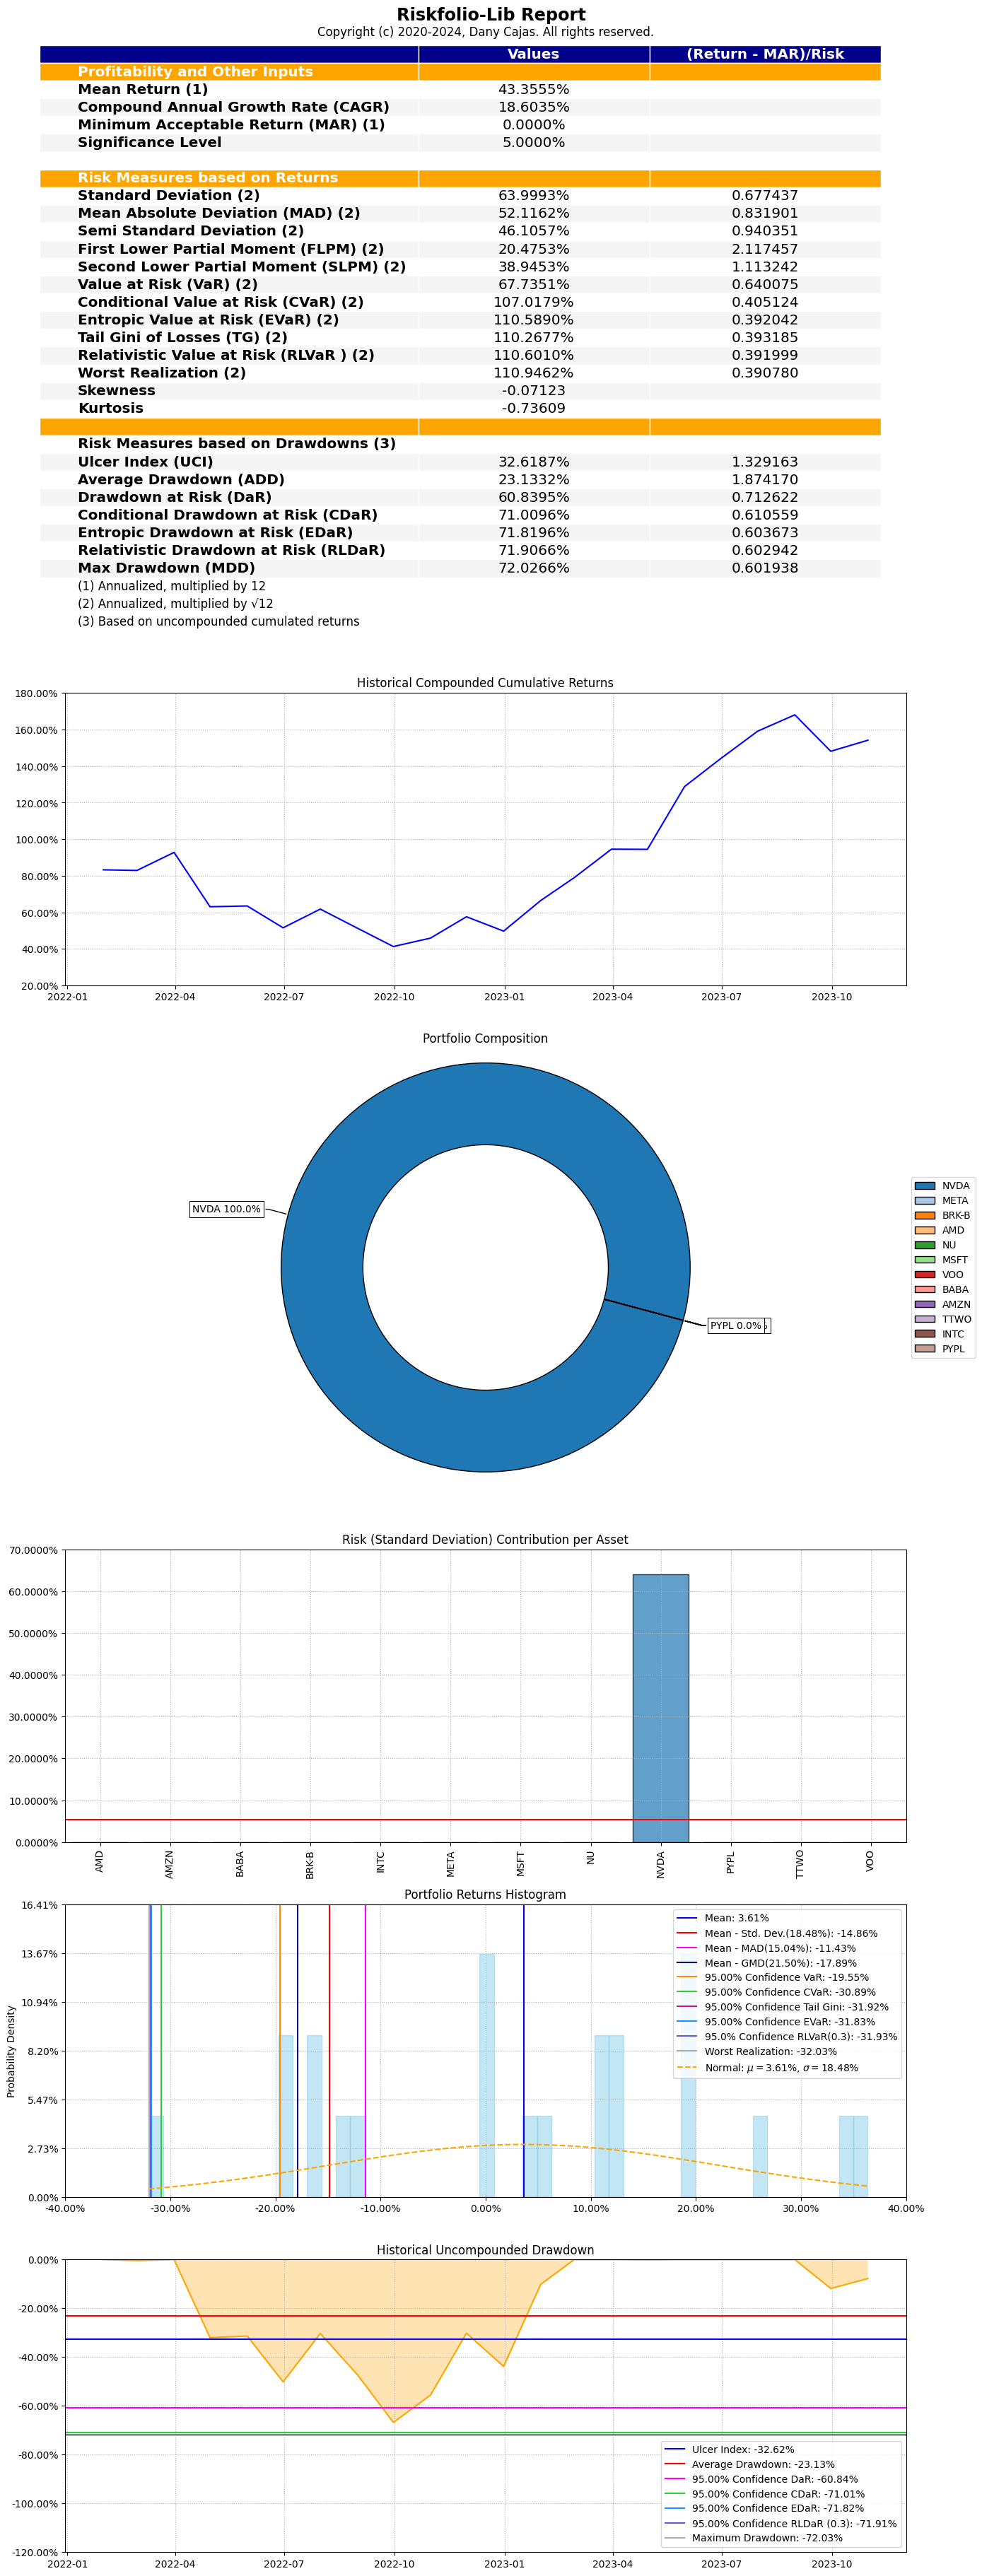

In [38]:
ax=rp.jupyter_report(Y,w,rm=rm,t_factor=12)
plt.show()